##Debug

In [ ]:
#%pdb off

##Imports

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!cp /content/drive/MyDrive/Aprendizagem_Máquina_2020-1/bankruptcy/smote.py .

In [ ]:
import smote

import pprint
pp = pprint.PrettyPrinter(indent=4)

In [ ]:
pip install -U imbalanced-learn

     |████████████████████████████████| 215kB 12.6MB/s 
     |████████████████████████████████| 22.3MB 1.3MB/s 
  Found existing installation: scikit-learn 0.22.2.post1
    Uninstalling scikit-learn-0.22.2.post1:
      Successfully uninstalled scikit-learn-0.22.2.post1
  Found existing installation: imbalanced-learn 0.4.3
    Uninstalling imbalanced-learn-0.4.3:
      Successfully uninstalled imbalanced-learn-0.4.3


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

#Bagging
from imblearn.ensemble import BalancedBaggingClassifier
#SMOTE
from imblearn.over_sampling import SMOTE
#UNDERBAGGING
from imblearn.under_sampling import RandomUnderSampler
#SMOTEBOOST
from imblearn.ensemble import EasyEnsembleClassifier
#RUSBOOST
from imblearn.ensemble import RUSBoostClassifier

#Métricas
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from matplotlib import pyplot

##Data

In [ ]:
# Train set
df_train = pd.read_csv('/content/drive/MyDrive/Aprendizagem_Máquina_2020-1/bankruptcy/clean_data.csv')
df_train.head()

,Unnamed: 0,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr10,Attr11,Attr12,Attr13,Attr14,Attr15,Attr16,Attr17,Attr18,Attr19,Attr20,Attr21,Attr22,Attr23,Attr24,Attr25,Attr26,Attr27,Attr28,Attr29,Attr30,Attr31,Attr32,Attr33,Attr34,Attr35,Attr36,Attr37,Attr38,Attr39,Attr40,Attr41,Attr42,Attr43,Attr44,Attr45,Attr46,Attr47,Attr48,Attr49,Attr50,Attr51,Attr52,Attr53,Attr54,Attr55,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64,class
0,8496,-0.039291,-0.058388,0.587704,2.280182,0.010573,-0.015889,-0.000479,0.164163,-0.947384,0.084969,-0.221349,0.602820,-0.010115,-0.000484,0.004851,-0.340687,0.126169,-0.002628,0.044811,-0.060086,-0.016589,-0.237837,0.043390,-0.012843,0.254277,-0.328284,1.322093,-0.016894,-2.043203,-0.011786,0.042100,-0.029495,1.656072,-0.294124,-0.430546,-1.165116,-0.033358,0.084464,-0.013766,2.157008,-0.007393,0.031397,-0.006624,0.002654,0.008339,2.981314,-0.039083,-0.002365,0.042171,-0.307297,-1.481306,-0.028882,-0.018424,-0.017037,-0.120325,0.009310,0.005465,-0.010274,-0.017543,-0.019615,-0.306676,-0.020105,1.430217,-0.048178,0
1,13920,-0.020607,0.084267,-0.704885,-0.229100,0.006288,-0.015889,0.001717,-0.497915,-0.634855,-0.095736,-0.180545,-0.082032,-0.010341,0.001712,0.013687,-0.384813,-0.504423,-0.000466,0.029003,-0.015503,-0.015721,-0.401039,0.032801,-0.027669,-0.157665,-0.358473,-0.010062,-0.021792,0.483373,0.004743,0.066171,-0.009941,-0.441072,-0.428041,-0.401639,-0.866023,-0.033684,0.036370,-0.010851,-0.136267,-0.007211,-0.013759,-0.016981,-0.015437,0.004608,-0.227556,-0.016708,-0.255001,-0.010537,-0.788539,-0.576017,-0.009285,-0.037769,-0.020997,-0.159807,0.012424,0.016303,-0.012237,0.017528,-0.042088,-0.045610,-0.009703,-0.366673,-0.046377,0
2,12980,-0.088343,-0.027121,-0.343012,-0.144971,0.007772,-0.015889,-0.010022,-0.092650,-0.595484,0.045363,-0.267986,-0.173623,-0.012270,-0.010027,0.056571,-0.464209,-0.118437,-0.012024,-0.001928,-0.073132,-0.016657,-0.279753,0.001814,-0.011546,0.217415,-0.443191,-0.010018,-0.020560,-0.660377,-0.010498,0.011146,-0.019563,-0.202084,-0.090560,-0.281678,-0.828344,-0.033474,0.064584,0.007874,-0.148943,-0.007365,0.002885,-0.014245,-0.003296,-0.012225,-0.014557,-0.043809,-0.079912,0.018414,-0.581714,-0.810976,-0.018928,-0.024656,-0.019269,-0.118725,0.009726,0.002026,-0.009355,-0.015589,3.470566,-0.274339,-0.013211,-0.221936,-0.045872,0
3,2579,0.304549,-0.054473,0.611399,0.121319,0.007839,0.118346,0.074375,-0.072767,-0.276445,0.009637,1.169792,0.717807,-0.009202,0.074370,-0.021642,0.967917,0.088412,0.071077,0.069670,-0.048643,-0.014393,1.276561,0.059836,0.140727,0.129787,0.829466,-0.009985,-0.015462,0.043390,-0.024878,0.068441,-0.027928,0.825169,-0.365597,1.407702,0.524862,-0.033207,0.015708,0.081420,0.067877,-0.007502,0.063734,-0.023073,-0.016546,0.007229,0.137538,-0.033755,1.013936,0.076193,0.010787,-0.845397,-0.027311,-0.020126,-0.017503,-0.014708,0.010900,0.040025,-0.011058,-0.016845,-0.033155,0.019799,-0.019358,0.872982,-0.028910,0
4,7889,-0.077461,-0.041334,0.509071,-0.028586,0.007770,-0.020030,-0.019380,-0.008366,-0.370743,0.056535,-0.572637,-0.228388,-0.012915,-0.019386,1.266957,-0.532348,-0.021762,-0.021239,-0.010877,-0.039380,-0.015817,-0.083607,0.004464,-0.064671,0.246438,-0.357503,-0.010046,-0.014676,1.139798,-0.021860,-0.016912,-0.023621,0.054158,-0.623580,-0.093193,0.125176,-0.032399,0.022479,0.005184,-0.133261,-0.007452,0.004263,-0.014183,-0.008650,0.003916,0.012620,-0.031242,0.025134,0.025538,0.111551,-0.305373,-0.022995,-0.006171,-0.013715,0.425800,0.009674,0.002882,-0.009832,-0.020804,-0.037412,-0.221942,-0.016030,0.012348,-0.028527,0


In [ ]:
X = df_train.iloc[:, 1:-1].values
y = df_train.iloc[:, -1].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

##Métricas

In [ ]:
def get_scores(y_test, y_pred):
  avg = 'weighted'

  recall = recall_score(y_test, y_pred, average=avg)
  accuracy = accuracy_score(y_test, y_pred)
  precision = precision_score(y_test, y_pred, average=avg)
  f1 = f1_score(y_test, y_pred, average=avg)
  aucroc = roc_auc_score(y_test, y_pred, average=avg)
  fpr, tpr, _ = roc_curve(y_test, y_pred)

  scores = {
      'recall': recall,
      'accuracy': accuracy,
      'precision': precision,
      'f1': f1,
      'aucroc': aucroc,
      'fpr': fpr,
      'tpr': tpr
  }

  return scores

##SMOTEBAGGING

In [ ]:
# Criação do modelo e predição
smote_bagging = BalancedBaggingClassifier(bootstrap=True, n_jobs=-1, sampler=SMOTE())
smote_bagging.fit(X_train, y_train)
y_pred_sb = smote_bagging.predict(X_test)

# Métricas
scores_sb = get_scores(y_test, y_pred_sb)

In [ ]:
pp.pprint(scores_sb)

{   'accuracy': 0.9739502999143101,
    'aucroc': 0.6077305107509287,
    'f1': 0.9705734313341541,
    'fpr': array([0.        , 0.00841958, 1.        ]),
    'precision': 0.9682176691592745,
    'recall': 0.9739502999143101,
    'tpr': array([0.       , 0.2238806, 1.       ])}


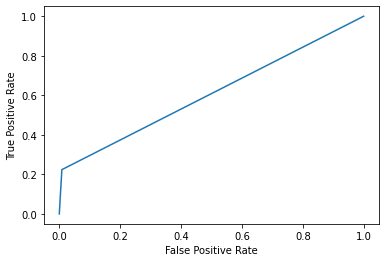

In [ ]:
# Gráfico curva roc
pyplot.plot(scores_sb['fpr'], scores_sb['tpr'])
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.show()

##UNDERBAGGING

In [ ]:
# Criação do modelo e predição
underbagging = BalancedBaggingClassifier(bootstrap=True, n_jobs=-1, sampler=RandomUnderSampler())
underbagging.fit(X_train, y_train)
y_pred_ub = underbagging.predict(X_test)

# Métricas
scores_ub = get_scores(y_test, y_pred_ub)

In [ ]:
pp.pprint(scores_ub)

{   'accuracy': 0.8651242502142245,
    'aucroc': 0.814380561671558,
    'f1': 0.9097588929293413,
    'fpr': array([0.        , 0.13243291, 1.        ]),
    'precision': 0.9734877478065447,
    'recall': 0.8651242502142245,
    'tpr': array([0.        , 0.76119403, 1.        ])}


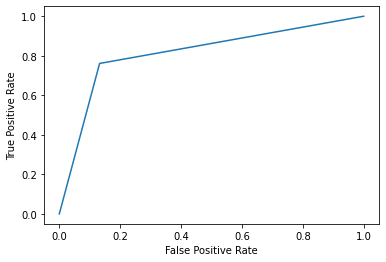

In [ ]:
# Gráfico curva roc
pyplot.plot(scores_ub['fpr'], scores_ub['tpr'])
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.show()

##SMOTEBOOST

In [ ]:
# Criação do modelo e predição, usando smote.py
smote_boost = smote.SMOTEBoost()
smote_boost.fit(X_train, y_train)
y_pred_sbs = smote_boost.predict(X_test)

# Métricas
scores_sbs = get_scores(y_test, y_pred_sbs)
pp.pprint(scores_sbs)

{   'accuracy': 0.9725792630676949,
    'aucroc': 0.6216034369461236,
    'f1': 0.97022186523853,
    'fpr': array([0.        , 0.01052447, 1.        ]),
    'precision': 0.9683230210512649,
    'recall': 0.9725792630676949,
    'tpr': array([0.        , 0.25373134, 1.        ])}


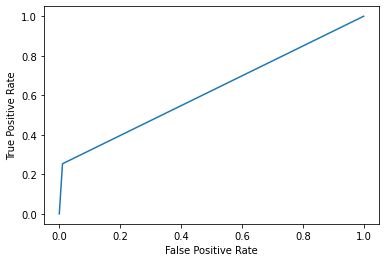

In [ ]:
# Gráfico curva roc
pyplot.plot(scores_sbs['fpr'], scores_sbs['tpr'])
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.show()

##RUSBOOST

In [ ]:
# Criação do modelo e predição
rus_boost = RUSBoostClassifier()
rus_boost.fit(X_train, y_train)
y_pred_rbs = rus_boost.predict(X_test)

# Métricas
scores_rbs = get_scores(y_test, y_pred_rbs)
pp.pprint(scores_rbs)

{   'accuracy': 0.8296486718080548,
    'aucroc': 0.7743640157395796,
    'f1': 0.8881190698170724,
    'fpr': array([0.        , 0.16768988, 1.        ]),
    'precision': 0.9713684329625445,
    'recall': 0.8296486718080548,
    'tpr': array([0.        , 0.71641791, 1.        ])}


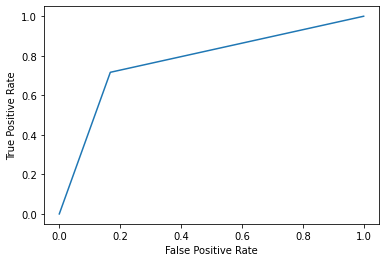

In [ ]:
# Gráfico curva roc
pyplot.plot(scores_rbs['fpr'], scores_rbs['tpr'])
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.show()